## Content

This notebook presents an exploratory analysis of worldwide natural disaster events recorded between 2023 and 2025. The dataset captures key attributes such as disaster type, geographic location, severity level, number of affected individuals, estimated economic losses, and emergency response timing. Through structured exploratory data analysis (EDA) and visualizations, the notebook aims to identify relevant patterns, trends, and associations across different categories of natural disasters.

## Context and Motivation

Natural disasters pose significant economic and social challenges at a global scale, affecting governments, humanitarian organizations, and policymakers alike. Understanding how these events are distributed over time and across regions, as well as the magnitude of their impacts, is essential for improving disaster preparedness, emergency response planning, and risk mitigation strategies. In this context, data-driven insights play a critical role in highlighting vulnerable areas and supporting more informed resource allocation.

This analysis focuses on exploring the following questions:

* Whether different types of natural disasters tend to coexist within the same temporal or geographic contexts;

* How seasonal patterns relate to the occurrence of these events;

* Whether certain countries, due to their geographic location, tend to experience a higher frequency of natural disasters (for example, countries such as the Philippines, located along the Pacific Ring of Fire);

* Which countries experience the greatest economic and social impacts associated with natural disasters.

Rather than analyzing disaster events in isolation, this study adopts a holistic exploratory approach to uncover broader patterns in their occurrence and impact. By examining temporal, geographic, and categorical dimensions simultaneously, the analysis seeks to reveal trends of coexistence, seasonality, and regional concentration that may not be immediately evident from individual records.

The findings of this exploratory analysis are intended to serve as an analytical foundation for subsequent decision-making processes, such as strategic planning, prioritization of resources, or the development of more advanced analytical models. At the same time, the study acknowledges the inherent limitations of exploratory data analysis and the scope of the available dataset, avoiding causal interpretations and focusing instead on observable associations and distributions.

### 1. Inicialization

In [1466]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

In [1467]:
data = pd.read_csv('synthetic_disaster_events_2025.csv')
display(data.sample(5))

paises = pd.read_csv('pais_km2_pop.csv')
display(paises)

estaciones = pd.read_csv('season.csv')
display(estaciones)

,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
17272,17273,Earthquake,Indonesia,1.525799,115.676361,2023-03-28,9,47916,10763394.26,62.22,Yes,0.54,1
13325,13326,Volcanic Eruption,Turkey,37.706706,34.848089,2025-08-16,7,37489,5349588.71,69.02,Yes,0.60,1
5884,5885,Landslide,Japan,38.257974,135.732186,2025-10-24,4,17602,1086028.20,49.58,Yes,0.23,0
16903,16904,Volcanic Eruption,Philippines,15.040572,122.711531,2023-07-19,6,36491,3169031.90,32.05,Yes,0.41,0
18675,18676,Earthquake,Japan,35.820116,137.695204,2024-08-14,8,39286,7749751.76,66.79,Yes,0.77,1


,country,km2,population
0,Chile,756096,19603700
1,India,3287263,1428627663
2,Italy,301340,58853482
3,Turkey,783562,85739100
4,Indonesia,1904569,279798049
5,Japan,377975,123294513
6,USA,9833517,339996570
7,Philippines,300000,117337370


,country,month,month_name,season
0,Chile,1,enero,Summer
1,Chile,2,febrero,Summer
2,Chile,3,marzo,Autumn
3,Chile,4,abril,Autumn
4,Chile,5,mayo,Autumn
...,...,...,...,...
91,Philippines,8,agosto,Rainy
92,Philippines,9,septiembre,Rainy
93,Philippines,10,octubre,Rainy
94,Philippines,11,noviembre,Dry


### 2. Preparing the data for analysis

In [1468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     20000 non-null  int64  
 1   disaster_type                20000 non-null  object 
 2   location                     20000 non-null  object 
 3   latitude                     20000 non-null  float64
 4   longitude                    20000 non-null  float64
 5   date                         20000 non-null  object 
 6   severity_level               20000 non-null  int64  
 7   affected_population          20000 non-null  int64  
 8   estimated_economic_loss_usd  20000 non-null  float64
 9   response_time_hours          20000 non-null  float64
 10  aid_provided                 20000 non-null  object 
 11  infrastructure_damage_index  20000 non-null  float64
 12  is_major_disaster            20000 non-null  int64  
dtypes: float64(5), i

In [1566]:
print('Amount of duplicates:', data.duplicated().sum())
print('Amount of null values:')
print(data.isna().sum())


Amount of duplicates: 0
Amount of null values:
event_id                       0
disaster_type                  0
location                       0
latitude                       0
longitude                      0
date                           0
severity_level                 0
affected_population            0
estimated_economic_loss_usd    0
response_time_hours            0
aid_provided                   0
infrastructure_damage_index    0
is_major_disaster              0
week                           0
month                          0
year                           0
dtype: int64


In [1567]:
#paso a tipo fecha la columna date
data['date'] = pd.to_datetime(data['date'])

#creo columnas: semana, mes y año
data['week'] = data['date'].dt.isocalendar().week
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.isocalendar().year

In [1568]:
#reordamos las columnas

data_clean = data.iloc[:, [0, 1, 2, 3, 4, 5, 13, 14, 15, 6, 7, 8, 9, 10, 11, 12]]

In [1569]:
display(data_clean.sample(5))

,event_id,disaster_type,location,latitude,longitude,date,week,month,year,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
13156,13157,Flood,Chile,-34.761840,-70.077816,2024-10-17,42,10,2024,9,56661,9668541.43,44.52,Yes,0.73,1
4501,4502,Wildfire,Chile,-36.378017,-74.677931,2023-01-28,4,1,2023,9,48200,9627297.24,26.52,Yes,0.67,1
19059,19060,Wildfire,Chile,-33.963352,-69.671639,2025-11-16,46,11,2025,9,52939,7454680.68,52.63,Yes,0.65,1
16591,16592,Wildfire,India,21.598201,83.591594,2024-10-19,42,10,2024,6,19638,5105729.13,25.96,Yes,0.40,0
4808,4809,Flood,Italy,39.041384,14.229186,2024-09-18,38,9,2024,5,25228,2453327.81,10.32,Yes,0.81,0


### EDA

In [1570]:
#Obervamos fechas de comienzo y finalización de los registros
print('Fecha de comienzo de registros:', data_clean['date'].min())
print('Fecha de finalización de registros:', data_clean['date'].max())
print("")

#Tipo de eventos registrados
print('Eventos unicos:', data_clean['disaster_type'].unique())
print("")

#paises de donde se obtienen estos registros
print('Cantidad de paises afectados registrados:', (data_clean['location'].unique()))

Fecha de comienzo de registros: 2022-12-08 00:00:00
Fecha de finalización de registros: 2025-12-07 00:00:00

Eventos unicos: ['Wildfire' 'Hurricane' 'Volcanic Eruption' 'Drought' 'Landslide'
 'Earthquake' 'Flood']

Cantidad de paises afectados registrados: ['Chile' 'India' 'Italy' 'Turkey' 'Indonesia' 'Japan' 'USA' 'Philippines']


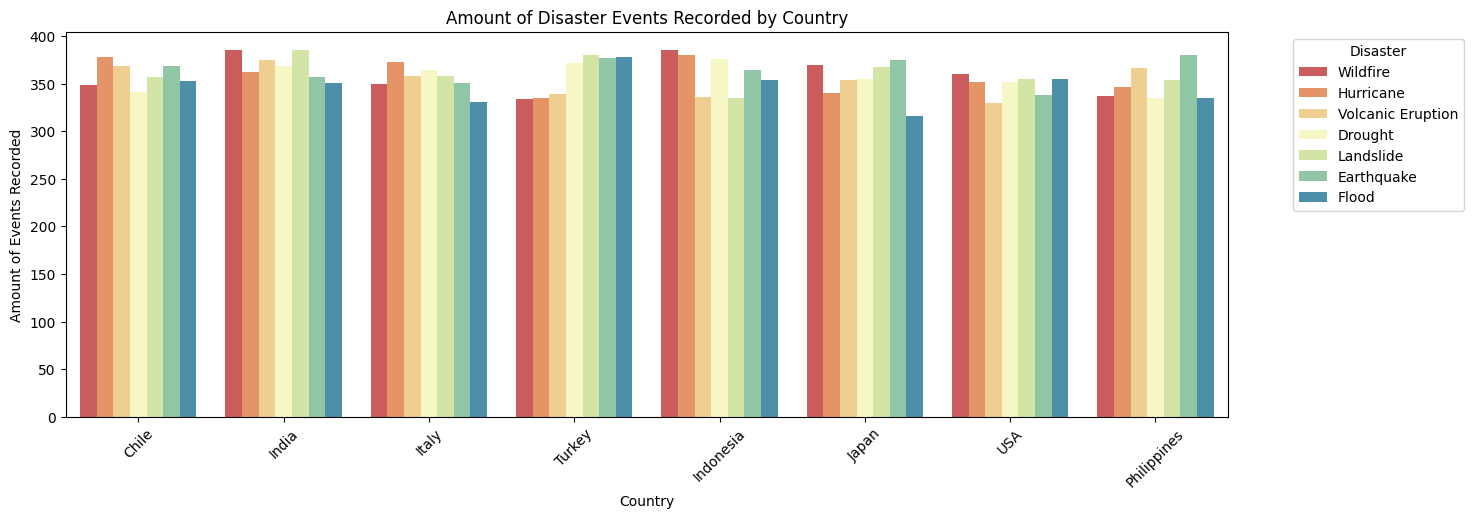

In [1571]:
#Graficamos por pais tipo de evento registrado
plt.figure(figsize=(15,5))
sns.countplot(data=data_clean, x='location', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Country')
plt.xlabel('Country')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45);

Se puede observar que los países afectados son 8: Chile, India, Italia, Turkia, Indonesia, Japón, Estados Unidos y Filipinas.
Todos ellos son afectados por los fenómenos naturales registrando al menos 300 eventos desde la primera vez que se realizó un registro: 8 de diciembre del 2022 hasta el 7 de diciembre del 2025.

### Análisis temporal
En esta sección observaremos sí:
- Hubo un año en el que sucedieron más eventos que en otro?
- Cambian los tipo de desastre según la época del año?
- Existen meses con mayor concentracion de eventos?
- Cuales son las semanas con mayor registro de desastres naturales.


In [1572]:
#hacemos un merge entre el df estaciones y el df principal data_clean
season_country = pd.merge(data_clean, estaciones, how='left', left_on=['location', 'month'], right_on=['country', 'month'])
season_country = season_country[[ 'location', 'disaster_type', 'season','month_name', 'week', 'year']]
display(season_country.sample(5))

,location,disaster_type,season,month_name,week,year
680,Philippines,Drought,Rainy,septiembre,38,2024
17238,Chile,Landslide,Summer,febrero,6,2024
19660,Chile,Flood,Autumn,marzo,11,2024
2380,Turkey,Landslide,Winter,enero,4,2024
1913,Turkey,Flood,Autumn,octubre,43,2025


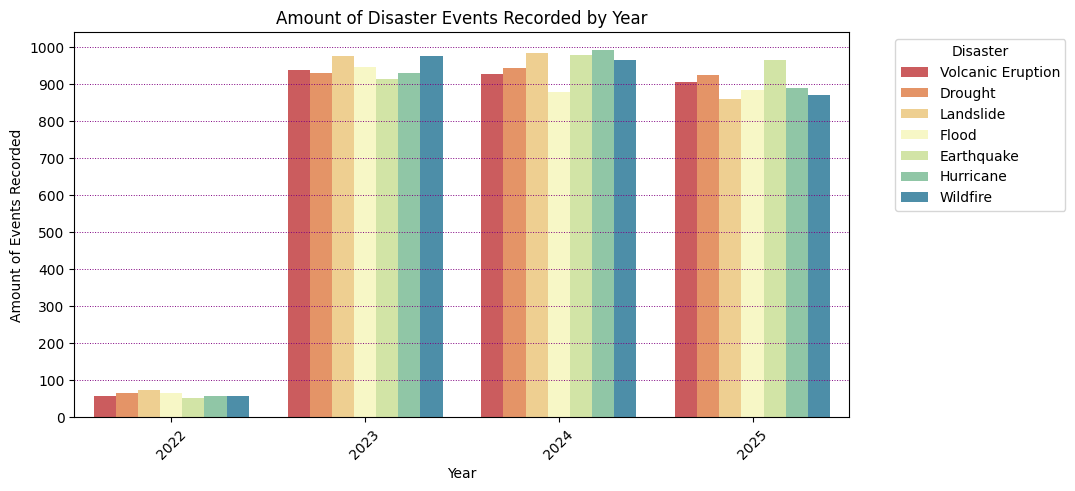

In [1573]:
#observamos la distribucion de los eventos segun los años
plt.figure(figsize=(10,5))
sns.countplot(data=data_clean, x='year', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Year')
plt.xlabel('Year')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.yticks(range(0, 1100, 100))
plt.xticks(rotation=45);

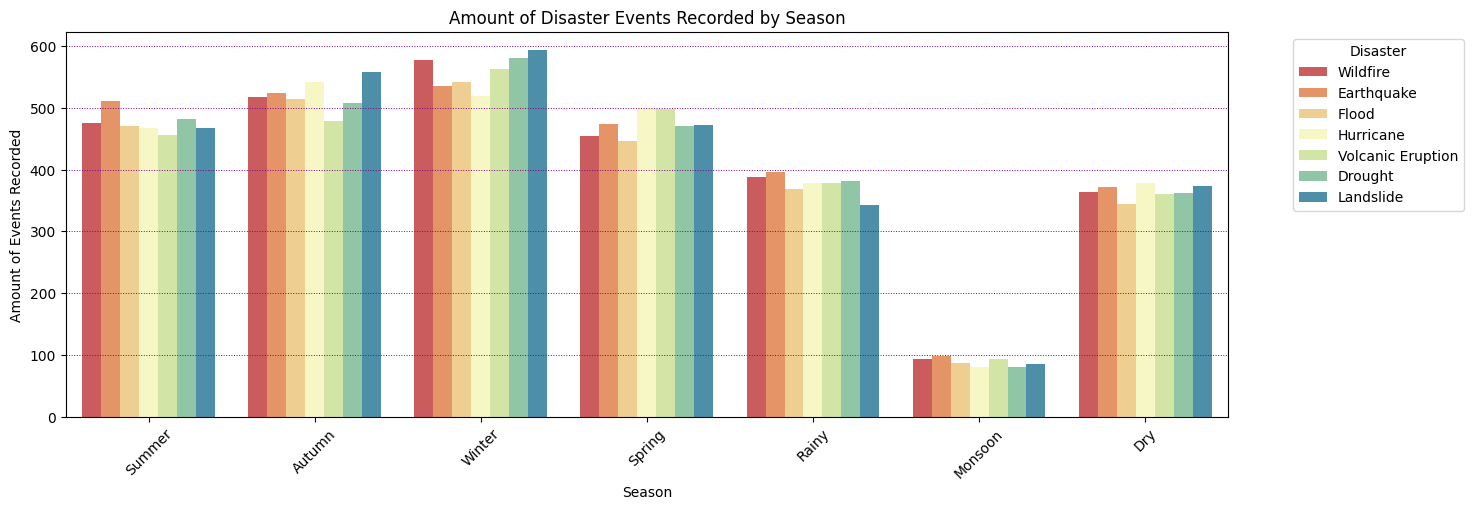

In [1574]:
#observamos como se ven los diferentes eventos segun la estacion del año
season_country = season_country.sort_values(by='season', key=lambda x: pd.Categorical(x, categories=['Summer', 'Autumn', 'Winter', 'Spring'], ordered=True))
plt.figure(figsize=(15,5))
sns.countplot(data=season_country, x='season', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Season')
plt.xlabel('Season')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.xticks(rotation=45);    

Como las estaciones del año se diferencian según la ubicación geográfica del país vamos a observar cómo se distribuyen los eventos registrados según los meses.

,month,event_count
0,1,1637
1,2,1518
2,3,1659
3,4,1655
4,5,1701
5,6,1610
6,7,1787
7,8,1709
8,9,1703
9,10,1686


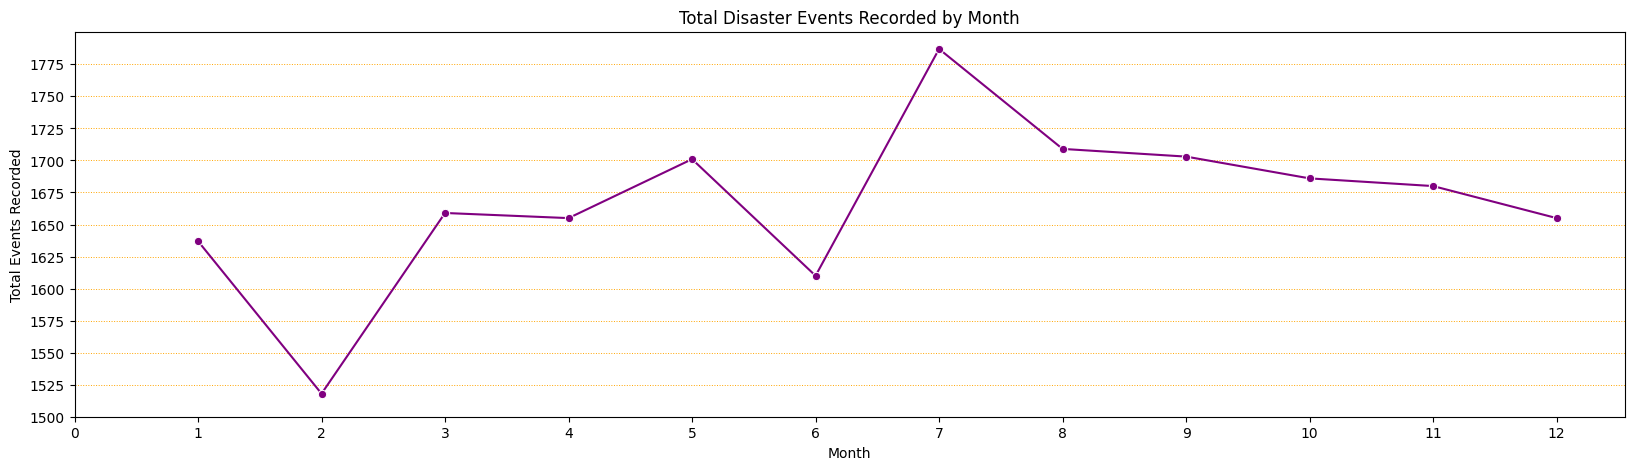

In [1786]:
#frecuencia de eventos totales registrados por mes
data_clean['month'] = data_clean['date'].dt.month
eventos_por_mes = data_clean.groupby('month')['disaster_type'].count().reset_index()
eventos_por_mes = eventos_por_mes.rename(columns={'disaster_type': 'event_count'})
display(eventos_por_mes)

#graficamos la frecuencia de eventos por mes
plt.figure(figsize=(20,5))
sns.lineplot(data=eventos_por_mes, x='month', y='event_count', marker='o', color='purple')
plt.title('Total Disaster Events Recorded by Month')
plt.xlabel('Month')
plt.ylabel('Total Events Recorded')
plt.grid(axis='y', color='orange', linestyle=':', linewidth=0.7)
plt.xticks(range(0, 13, 1))
plt.yticks(range(1500, 1800, 25));


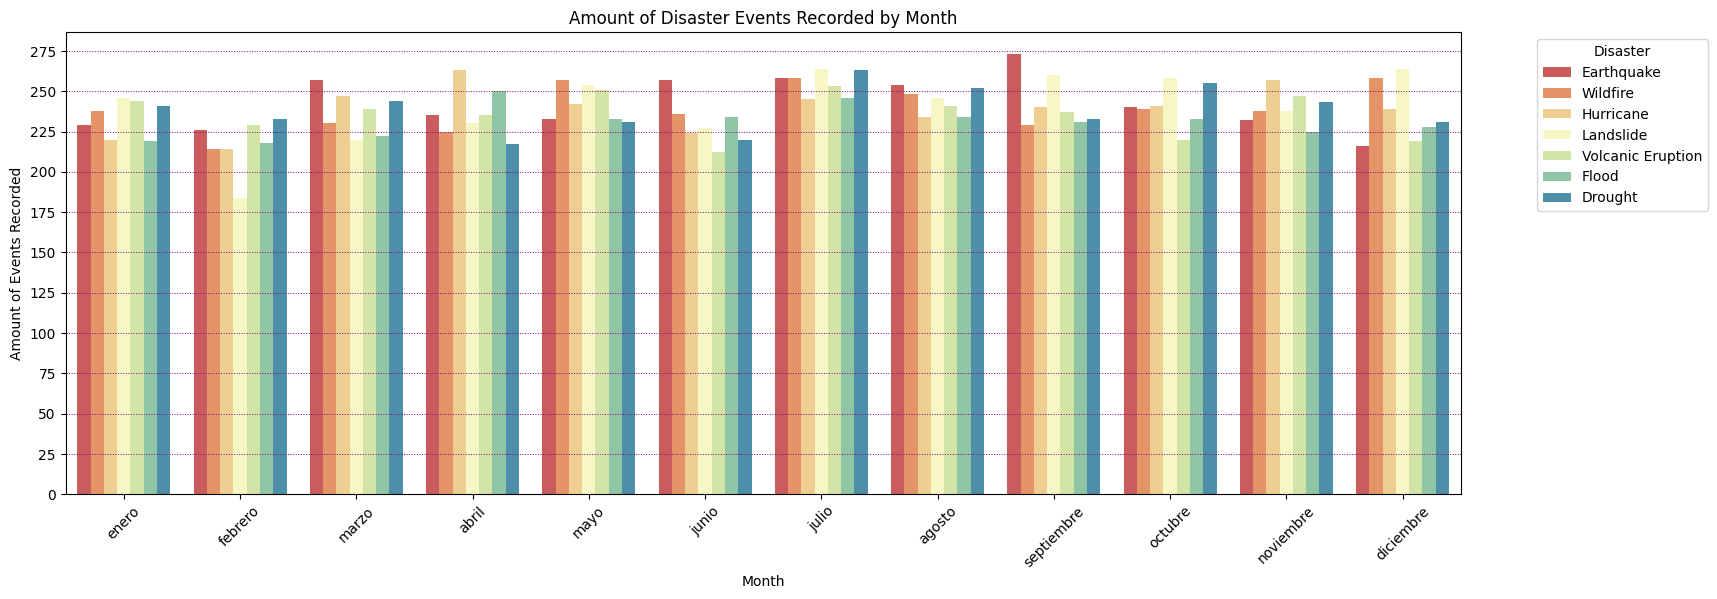

In [1787]:
#observamos la distribución de eventos a través de los meses del año
season_country = season_country.sort_values(by='month_name', 
                                            key=lambda x: pd.Categorical(x, 
                                                                        categories=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'], 
                                                                        ordered=True))
plt.figure(figsize=(18,6))
sns.countplot(data=season_country, x='month_name', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Month')
plt.xlabel('Month')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.xticks(rotation=45)
plt.yticks(range(0, 300, 25));

In [1788]:
#calculamos cantidad de eventos por tipo de desastre por semana del año
weekly_events = data_clean.groupby(['week','month'])['date'].count().reset_index()
weekly_events = weekly_events.rename(columns={'date': 'event_count'})

#top 5 de semanas con más eventos registrados
top_5_week = weekly_events.sort_values(by='event_count', ascending=False).head(5)
print('Top 5 semanas con más eventos registrados:')
display(top_5_week)

Top 5 semanas con más eventos registrados:


,week,month,event_count
38,30,7,436
63,49,12,434
14,12,3,428
36,28,7,425
49,39,9,421


2022 tiene menos cantidad de eventos registrados porque empezaron a tomarse los registros en diciembre de ese año y a 2025 le faltan 3 semanas de registros (las ultimas 3).

En general se ve que ningún año se distingue por mayor cantidad de ventos registrados.

La estación del año que registra mayor cantidad de eventos de todos los tipos es invierno, le sigue otoño y la que menos es monsoon.

El mes que tiene menos fenómenos naturales registrados es febrero y el que registra mayor cantidad de eventos de, todos los tipos, es julio.

El mes que registra mayor cantidad de X desastre natural:
- Abril: huracanes.
- Abril: inundaciones. 
- Mayo: erupciones volcánicas.
- Mayo, julio y diciembre: incendios.
- Julio: sequía.
- Septiembre: terremotos.
- Diciembre: avalancha/desprendimiento de tierra.

Semanas donde se registran mayor cantidad de catástrofes naturales:
- 30 con 436.
- 49 con 434.
- 12 con 428.
- 28 con 425.
- 39 con 421.

### Análisis geográfico

En esta parte obsevaremos:
- Ranking de los paises más afectados por cantidad de eventos.
- Top 10 de país y tipo de desastre contando cantidad de eventos registrados.
- Fenómeno más recurrente por país.

Ranking de países con más desastres naturales registrados en total:


,location,total_event_count
0,India,2583
1,Indonesia,2530
2,Chile,2515
3,Turkey,2515
4,Italy,2485
5,Japan,2477
6,Philippines,2453
7,USA,2442


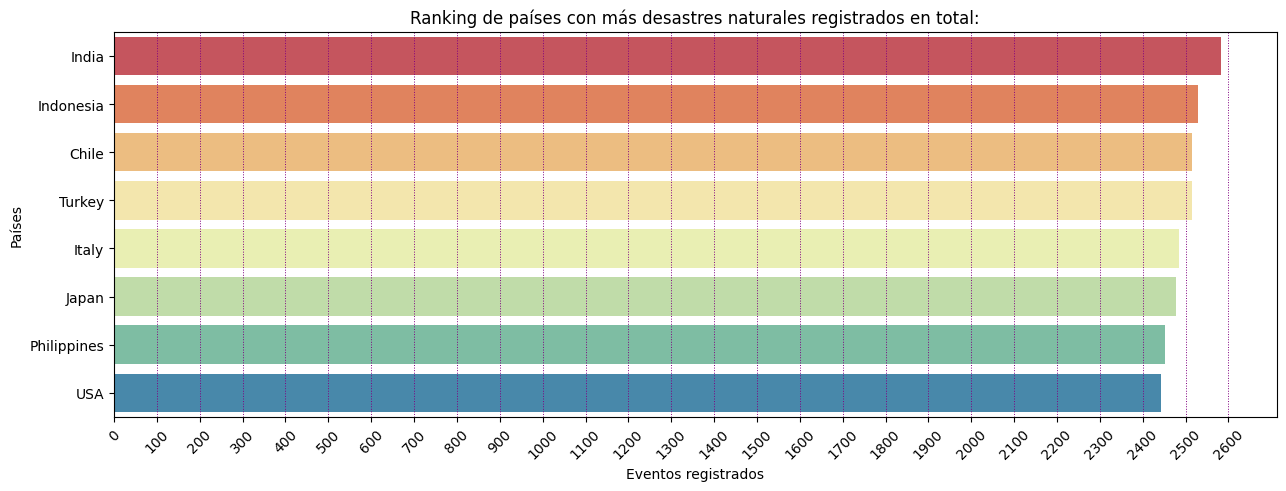

In [1789]:
#ranking de los paises con mas fenómenos naturales registrados en total:
total_events = data_clean.groupby('location')['date'].count().reset_index()
total_events = total_events.rename(columns={'date': 'total_event_count'})
total_events = total_events.sort_values(by='total_event_count', ascending=False).reset_index(drop=True)
print('Ranking de países con más desastres naturales registrados en total:')
display(total_events)

#graficamos
plt.figure(figsize=(15,5))
sns.barplot(data=total_events, x='total_event_count', y='location', palette='Spectral', hue='location')
plt.title('Ranking de países con más desastres naturales registrados en total:')
plt.xlabel('Eventos registrados')
plt.ylabel('Países')
plt.grid(axis='x', color='purple', linestyle=':', linewidth=0.7)
plt.xticks(range(0, 2700, 100))
plt.xticks(rotation=45)
plt.show()

In [1790]:
#agrupamos por pais y por tipo de desastre y contamos la cantidad de eventos registrados
country_type = data_clean.groupby(['location', 'disaster_type'])['date'].count().reset_index()
country_type = country_type.rename(columns={'date': 'event_count'})
print('Top 10 eventos registrados por país y por tipo de desastre:')
display(country_type.sort_values(by='event_count', ascending=False).head(10))

Top 10 eventos registrados por país y por tipo de desastre:


,location,disaster_type,event_count
20,Indonesia,Wildfire,385
11,India,Landslide,385
13,India,Wildfire,385
17,Indonesia,Hurricane,380
36,Philippines,Earthquake,380
46,Turkey,Landslide,380
3,Chile,Hurricane,378
44,Turkey,Flood,378
43,Turkey,Earthquake,377
14,Indonesia,Drought,376


Fenómeno más recurrente por país:


,location,disaster_type,event_count
0,India,Landslide,385
1,Indonesia,Wildfire,385
2,Philippines,Earthquake,380
3,Turkey,Landslide,380
4,Chile,Hurricane,378
5,Japan,Earthquake,375
6,Italy,Hurricane,373
7,USA,Wildfire,360


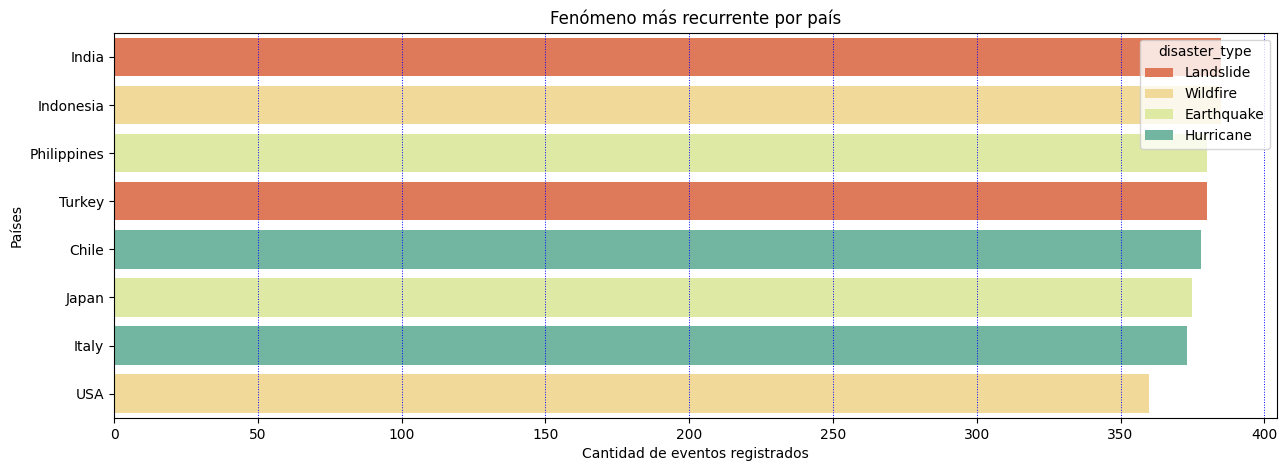

In [1791]:
#hacemos un ranking del fenómeno más recurrente por país
country_fenomeno = country_type.loc[country_type.groupby('location')['event_count'].idxmax()][['location', 'disaster_type', 'event_count']]
country_fenomeno = country_fenomeno.sort_values(by='event_count', ascending=False).reset_index(drop=True)
print('Fenómeno más recurrente por país:')
display(country_fenomeno)

#Graficamos
plt.figure(figsize=(15,5))
sns.barplot(data=country_fenomeno, x='event_count', y='location', palette='Spectral', hue='disaster_type')
plt.title('Fenómeno más recurrente por país')
plt.xlabel('Cantidad de eventos registrados')
plt.ylabel('Países')
plt.grid(axis='x', color='blue', linestyle=':', linewidth=0.7)
plt.show()

### tipo de desastre

- Qué desastres son mas frecuentes?

- Cuáles son mas dañinos? 

,disaster_type,event_count
1,Earthquake,2910
4,Landslide,2891
6,Wildfire,2870
3,Hurricane,2866
0,Drought,2863
5,Volcanic Eruption,2827
2,Flood,2773


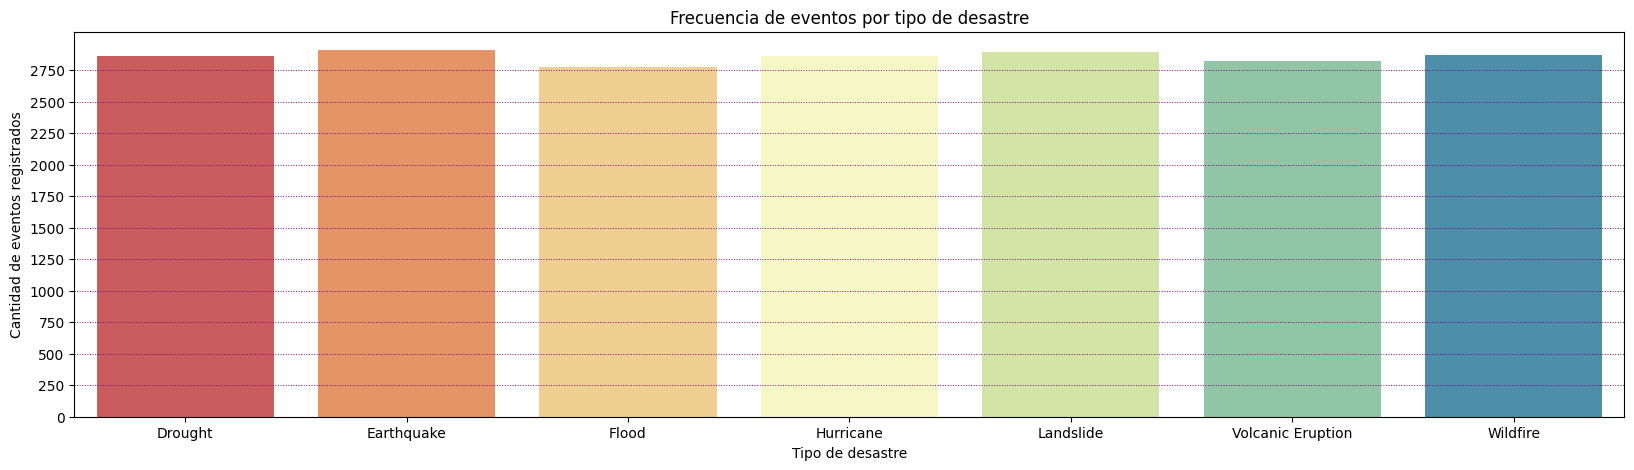

In [1792]:
#frecuencia de eventos por año
desastres_naturales = data_clean.groupby('disaster_type')['date'].count().reset_index()
desastres_naturales = desastres_naturales.rename(columns={'date': 'event_count'})
display(desastres_naturales.sort_values(by='event_count', ascending=False))

#graficamos
plt.figure(figsize=(20, 5))
sns.barplot(data=desastres_naturales, x='disaster_type', y='event_count', palette='Spectral', hue='disaster_type')
plt.title('Frecuencia de eventos por tipo de desastre')
plt.xlabel('Tipo de desastre')
plt.ylabel('Cantidad de eventos registrados')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.yticks(range(0, 3000, 250));

In [1793]:


#severidad de eventos por tipo de desastre

### Impacto

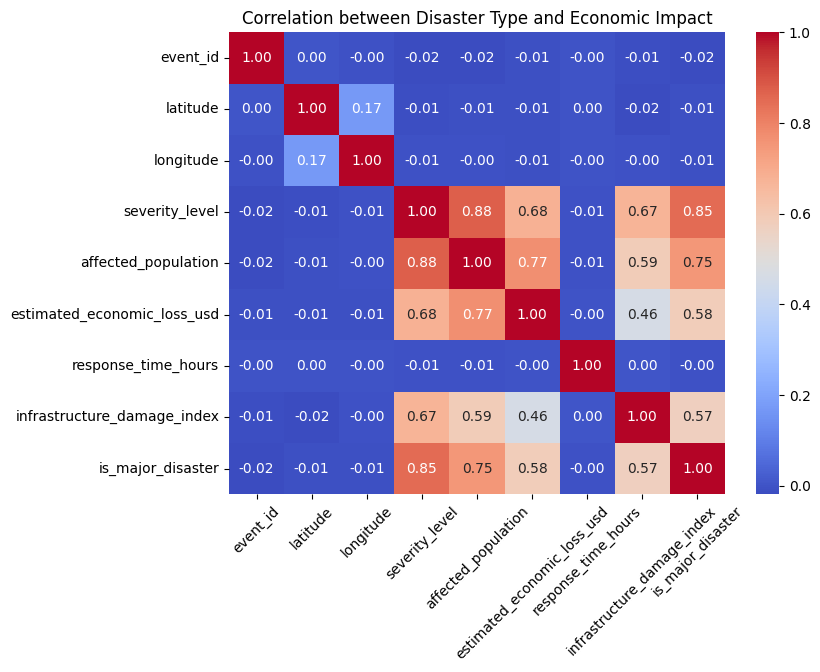

In [1794]:
#creamos un heatmap para observar la relacion entre impacto economico y tipo de desastre
cm = data_clean.select_dtypes(include=['int64', 'float64']).corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.title('Correlation between Disaster Type and Economic Impact')
plt.xticks(rotation=45);

In [1795]:
#victimas

In [1796]:
#daños económicos